"Human Pose Detection with Pre-trained Caffe Model"

This notebook demonstrates the application of a pre-trained Caffe model for human pose detection on single images. Utilizing the model, it detects and outputs the skeletal structure of human poses in various images. The implementation provides a visual representation of key joints and connections, showcasing the capabilities of pose estimation using deep learning techniques. Researchers and practitioners can use this notebook as a guide to explore and apply human pose detection in diverse image scenarios.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Caffe (Convolutional Architecture for Fast Feature Embedding) is a deep learning framework that is particularly popular for its efficiency and speed in training and inference. In the context of human pose detection, a pre-trained Caffe model typically refers to a neural network model that has been trained on a large dataset to recognize and predict human poses from input images. The model contains learned parameters that enable it to detect key joints and infer the skeletal structure of humans in images.

In practice, you can use pre-trained Caffe models, such as those based on Convolutional Neural Networks (CNNs), to perform human pose detection without the need to train the model from scratch. These models are trained on diverse datasets with annotated human poses, allowing them to generalize well to new images. The pre-trained model's weights are fine-tuned to capture the intricate features of human poses, making it a powerful tool for tasks like skeletal structure extraction in images.

In [2]:
protoFile = "./pose_deploy_linevec.prototxt"
weightsFile = "./pose_iter_440000.caffemodel"
nPoints = 18
POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]

In [3]:
frame = cv2.imread("./sean strickland.jpg")
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1

In [4]:
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

inWidth = 368
inHeight = 368

inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()
H = output.shape[2]
W = output.shape[3]

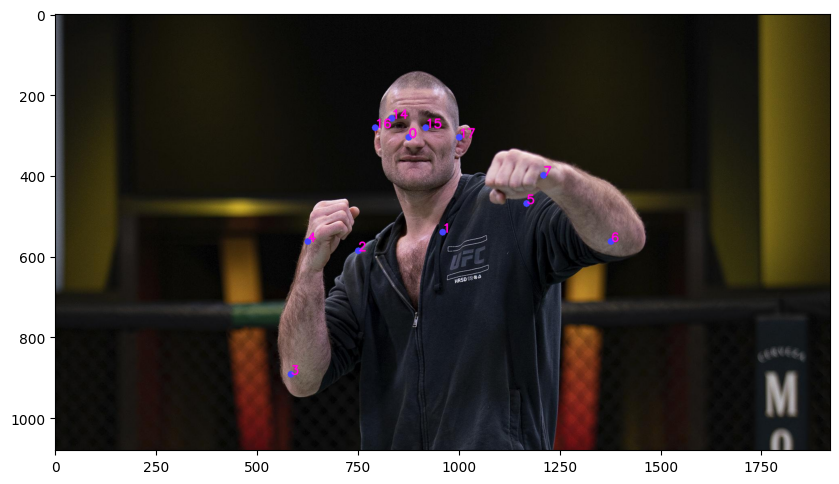

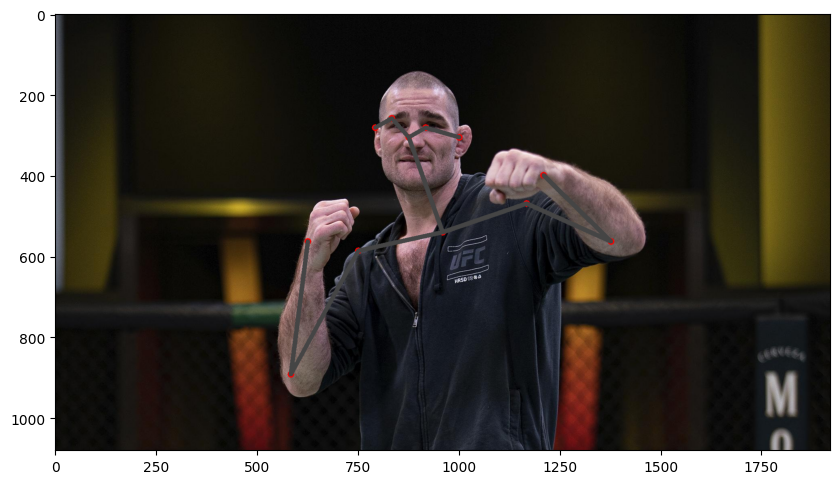

In [9]:
points = []

for i in range(nPoints):
    probMap = output[0, i, :, :]
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold : 
        cv2.circle(frameCopy, (int(x), int(y)), 8, (255, 69, 69), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2, lineType=cv2.LINE_AA)
        cv2.circle(frame, (int(x), int(y)), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
        points.append((int(x), int(y)))
    else :
        points.append(None)

for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (69, 69, 69), 10)

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### Different Pose

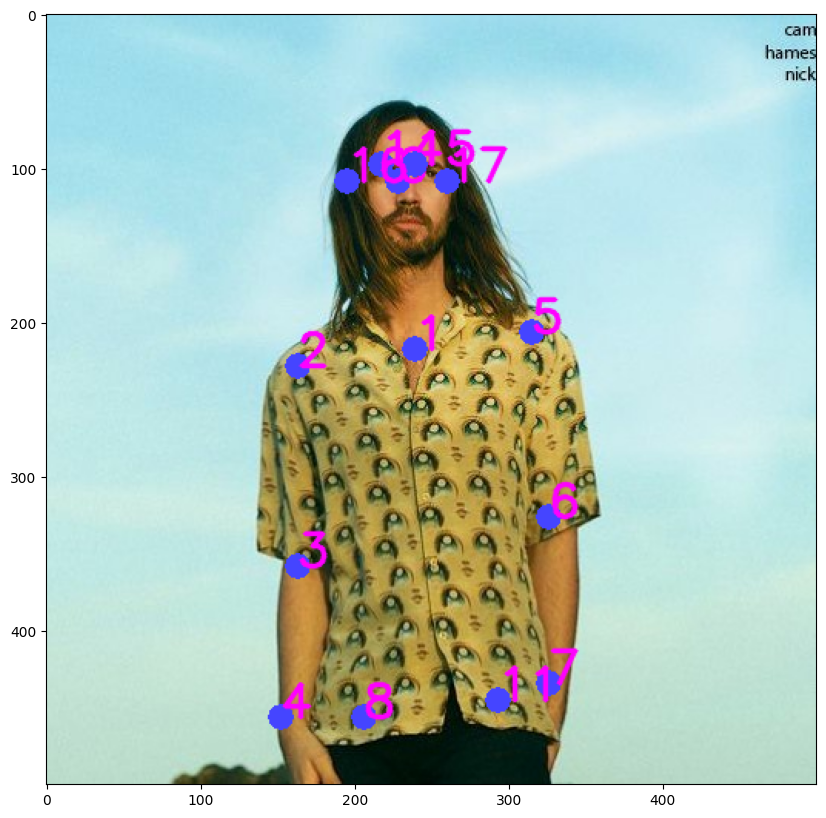

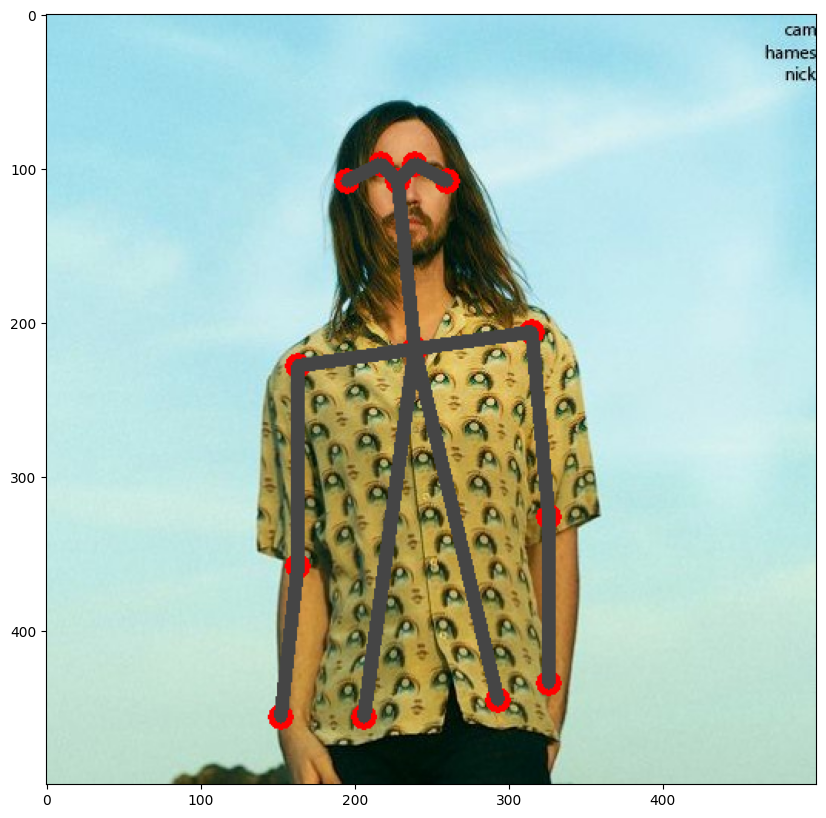

In [13]:
frame = cv2.imread("./tame impala.jpg")
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

inWidth = 368
inHeight = 368

inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()
H = output.shape[2]
W = output.shape[3]
points = []

for i in range(nPoints):
    probMap = output[0, i, :, :]
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold : 
        cv2.circle(frameCopy, (int(x), int(y)), 8, (255, 69, 69), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2, lineType=cv2.LINE_AA)
        cv2.circle(frame, (int(x), int(y)), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
        points.append((int(x), int(y)))
    else :
        points.append(None)

for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (69, 69, 69), 8)

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))